<a href="https://colab.research.google.com/github/Eliasdahdal/IA-HW/blob/master/SpeachANL601.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install sounddevice matplotlib numpy scipy


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import hamming
from scipy import signal



# Load the saved audio file
saved_filename = 'Faezone.wav'
fs, saved_voice = wavfile.read(saved_filename)

# Extract a segment from the loaded audio
segmentLength = 240


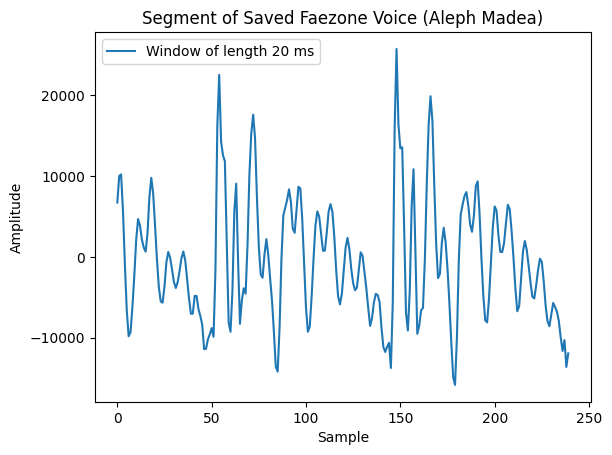

In [9]:
# ************** Aleph Madea **************

# Set start index for Aleph Madea segment
start_index_aleph = 19778
segment1 = saved_voice[start_index_aleph: start_index_aleph + segmentLength]

# Plot the segment
plt.figure()
plt.plot(segment1)
plt.legend(['Window of length 20 ms'])
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Segment of Saved Faezone Voice (Aleph Madea)')
plt.show()


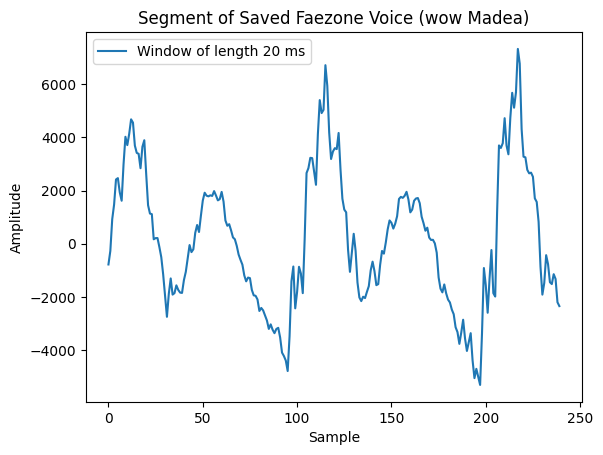

In [6]:
# ************** WOW Madea **************

# Set start index for wow Madea segment
start_index_wow = 29878
segment2 = saved_voice[start_index_wow: start_index_wow + segmentLength]

# Plot the segment
plt.figure()
plt.plot(segment2)
plt.legend(['Window of length 20 ms'])
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Segment of Saved Faezone Voice (wow Madea)')
plt.show()

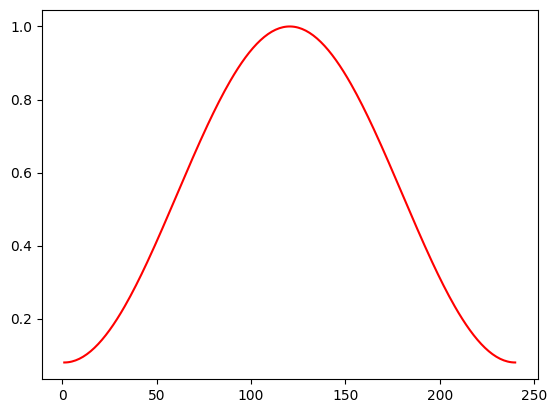

In [7]:
# Generate a Hamming window
ham = np.hamming(segmentLength)
plt.plot(np.arange(1, segmentLength + 1), ham, 'r', label='Hamming window')
plt.show()  # Display the plot

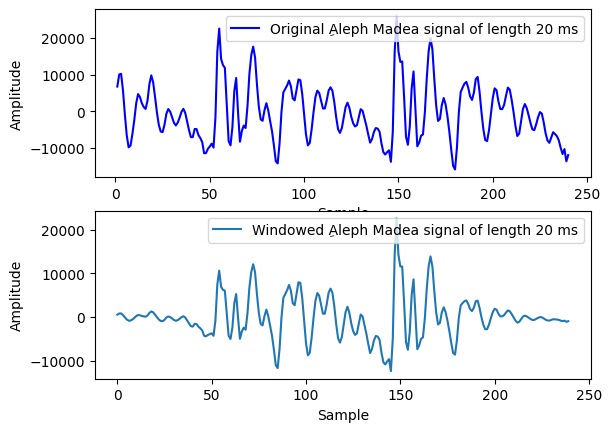

In [10]:
# Plot the original signal and the Hamming window
plt.subplot(2, 1, 1)
plt.plot(np.arange(1, segmentLength + 1), segment1, 'b', label='Original ِAleph Madea signal of length 20 ms')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Multiply the original signal by the Hamming window to obtain the windowed signal
x1 = segment1 * ham

# Plot the windowed signal
plt.subplot(2, 1, 2)  # Switch to the second subplot
plt.plot(x1)  # Plot the windowed signal
plt.legend(['Windowed ِAleph Madea signal of length 20 ms'])  # Add a legend
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()  # Display the plot

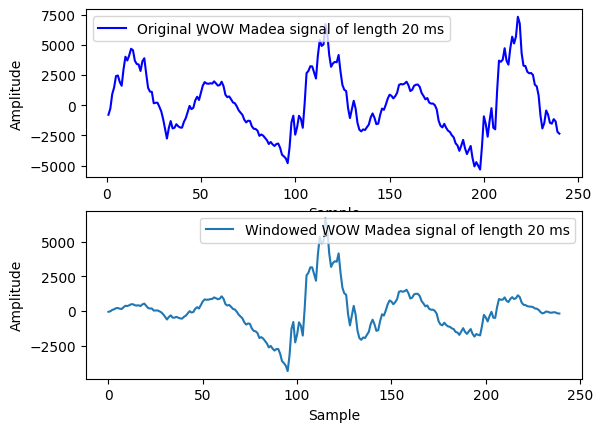

In [11]:
# Plot the original signal and the Hamming window
plt.subplot(2, 1, 1)
plt.plot(np.arange(1, segmentLength + 1), segment2, 'b', label='Original ِWOW Madea signal of length 20 ms')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Multiply the original signal by the Hamming window to obtain the windowed signal
x2 = segment2 * ham

# Plot the windowed signal
plt.subplot(2, 1, 2)  # Switch to the second subplot
plt.plot(x2)  # Plot the windowed signal
plt.legend(['Windowed ِWOW Madea signal of length 20 ms'])  # Add a legend
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()  # Display the plot

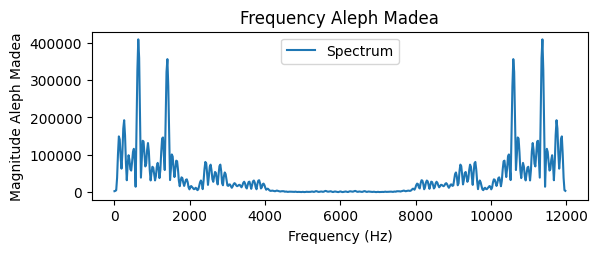

In [12]:
# Number of points for the FFT (Fast Fourier Transform)
N = 512

# Compute the FFT of the windowed signals x1 and x2 with N points
FDX1 = np.abs(np.fft.fft(x1, N))
FDX2 = np.abs(np.fft.fft(x2, N))

# Generate frequency values corresponding to the FFT results
f = np.arange(N) / N * fs

# Plot the spectrum of the first signal (x1) in the first subplot
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(f, FDX1)
plt.legend(['Spectrum'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude Aleph Madea')
plt.title('Frequency Aleph Madea')

plt.show()

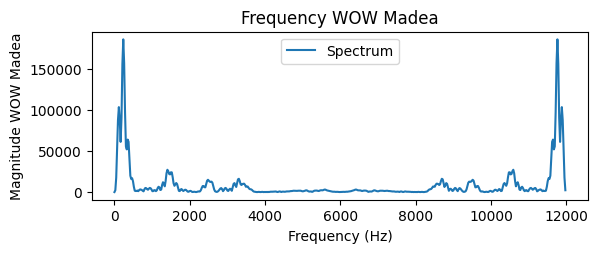

In [13]:
# Plot the spectrum of the second signal (x2) in the second subplot
plt.subplot(2, 1, 2)
plt.plot(f, FDX2)
plt.legend(['Spectrum'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude WOW Madea')
plt.title('Frequency WOW Madea')
plt.show()

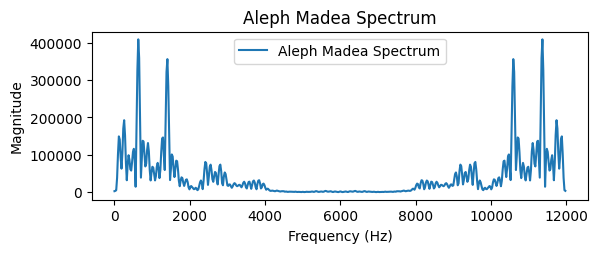

In [14]:
from scipy.signal import lfilter

# Remove the effect of high-frequency damping from the Aleph Madea spectrum
plt.figure()

# Plot the spectrum of the original Aleph Madea sample in the first subplot
plt.subplot(2, 1, 1)
plt.plot(f, FDX1)
plt.legend(['Aleph Madea Spectrum'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Aleph Madea Spectrum')

plt.show()


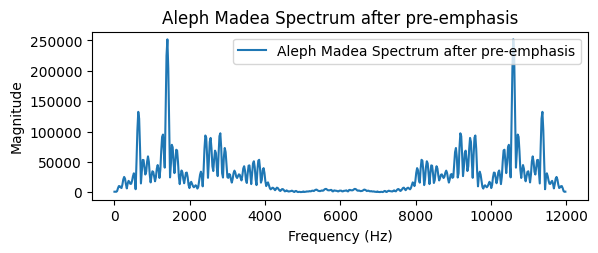

In [15]:
# Prepare a high-pass pre-emphasis filter with a coefficient of 0.97
preEmphasis = [1, -0.97]

# Apply the pre-emphasis filter to the Aleph Madea sample spectrum
x1 = lfilter(preEmphasis, 1, x1)

# Apply FFT to the signal after pre-emphasis to obtain the new spectrum
FDX1 = np.abs(np.fft.fft(x1, N))

# Plot the spectrum of the Aleph Madea sample after pre-emphasis in the second subplot
plt.subplot(2, 1, 2)
plt.plot(f, FDX1)
plt.legend(['Aleph Madea Spectrum after pre-emphasis'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Aleph Madea Spectrum after pre-emphasis')
plt.show()


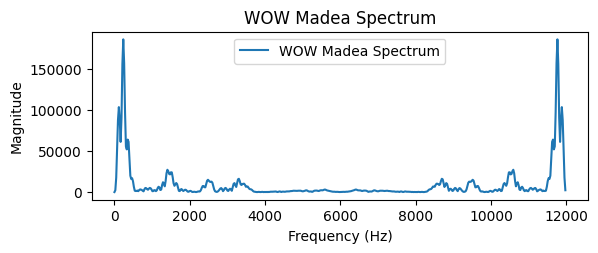

In [16]:
# Remove the effect of high-frequency damping from the WOW Madea spectrum
plt.figure()

# Plot the spectrum of the original WOW Madea sample in the first subplot
plt.subplot(2, 1, 1)
plt.plot(f, FDX2)
plt.legend(['WOW Madea Spectrum'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('WOW Madea Spectrum')
plt.show()

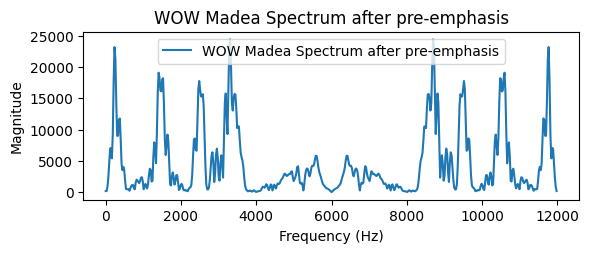

In [17]:
# Prepare a high-pass pre-emphasis filter with a coefficient of 0.97
preEmphasis = [1, -0.97]

# Apply the pre-emphasis filter to the WOW Madea sample spectrum
x2 = lfilter(preEmphasis, 1, x2)

# Apply FFT to the signal after pre-emphasis to obtain the new spectrum
FDX2 = np.abs(np.fft.fft(x2, N))

# Plot the spectrum of the WOW Madea sample after pre-emphasis in the second subplot
plt.subplot(2, 1, 2)
plt.plot(f, FDX2)
plt.legend(['WOW Madea Spectrum after pre-emphasis'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('WOW Madea Spectrum after pre-emphasis')
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter


def lpc(y, m):
    R = [y.dot(y)]
    if R[0] == 0:
        return [1] + [0] * (m-2) + [-1]
    else:
        for i in range(1, m + 1):
            r = y[i:].dot(y[:-i])
            R.append(r)
        R = np.array(R)
    #step 2:
        A = np.array([1, -R[1] / R[0]])
        E = R[0] + R[1] * A[1]
        for k in range(1, m):
            if (E == 0):
                E = 10e-17
            alpha = - A[:k+1].dot(R[k+1:0:-1]) / E
            A = np.hstack([A,0])
            A = A + alpha * A[::-1]
            E *= (1 - alpha**2)
        return A


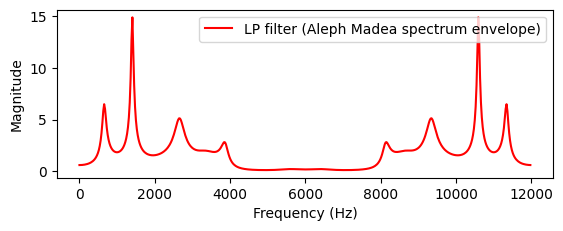

In [26]:
# Linear Prediction Coefficients Calculation
order = int(fs / 1000) + 2
coeff1 = lpc(x1, order)

# Apply the linear prediction coefficients to the signal
x1_filtered = lfilter([1], coeff1, x1)

# Spectrum Envelope Calculation (Aleph Madea)
envelope1 = 1.0 / np.abs(np.fft.fft(coeff1, N))

# Plotting
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(f, envelope1, 'r')
plt.legend(['LP filter (Aleph Madea spectrum envelope)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.show()

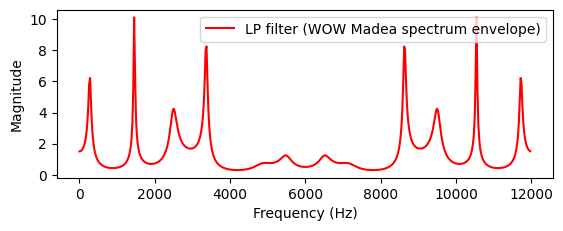

In [27]:
coeff2 = lpc(x2, order)

# Apply the linear prediction coefficients to the signal
x2_filtered = lfilter([1], coeff2, x2)

# Spectrum Envelope Calculation (Aleph Madea)
envelope2 = 1.0 / np.abs(np.fft.fft(coeff2, N))

# Plotting
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(f, envelope2, 'r')
plt.legend(['LP filter (WOW Madea spectrum envelope)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.show()



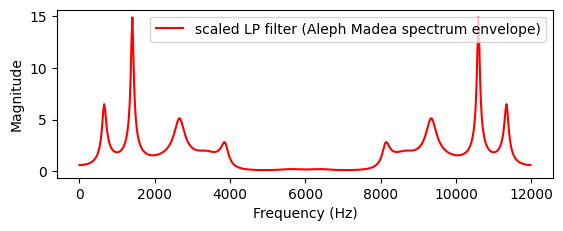

In [31]:
from scipy.signal import resample

# Improve the visualization of the spectrum envelope
plt.figure()

# Subplot for Aleph Madea spectrum
plt.subplot(2, 1, 1)
plt.plot(f, resample(envelope1, len(FDX1)), 'r')  # Use resample function for equivalent functionality
plt.legend(['scaled LP filter (Aleph Madea spectrum envelope)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.show()

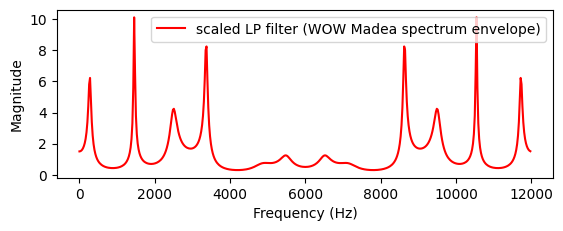

In [33]:
# Subplot for WOW Madea spectrum
plt.subplot(2, 1, 2)
plt.plot(f, resample(envelope2, len(FDX2)), 'r')  # Use resample function for equivalent functionality
plt.legend(['scaled LP filter (WOW Madea spectrum envelope)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

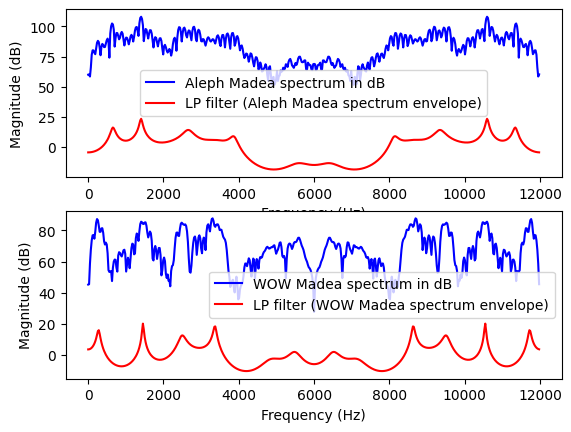

In [34]:
# Displaying the Spectrum Envelope in Decibels
FDX1dB = 20 * np.log10(FDX1)  # Display the spectrum in decibels
envelope1dB = 20 * np.log10(envelope1)  # Display the spectrum envelope in decibels
FDX2dB = 20 * np.log10(FDX2)  # Display the spectrum in decibels
envelope2dB = 20 * np.log10(envelope2)  # Display the spectrum envelope in decibels

# Plotting the Spectrum and its Envelope in Decibels
plt.figure()

# Subplot for Aleph Madea spectrum
plt.subplot(2, 1, 1)
plt.plot(f, FDX1dB, 'b', f, envelope1dB, 'r')
plt.legend(['Aleph Madea spectrum in dB', 'LP filter (Aleph Madea spectrum envelope)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')

# Subplot for WOW Madea spectrum
plt.subplot(2, 1, 2)
plt.plot(f, FDX2dB, 'b', f, envelope2dB, 'r')
plt.legend(['WOW Madea spectrum in dB', 'LP filter (WOW Madea spectrum envelope)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')

plt.show()

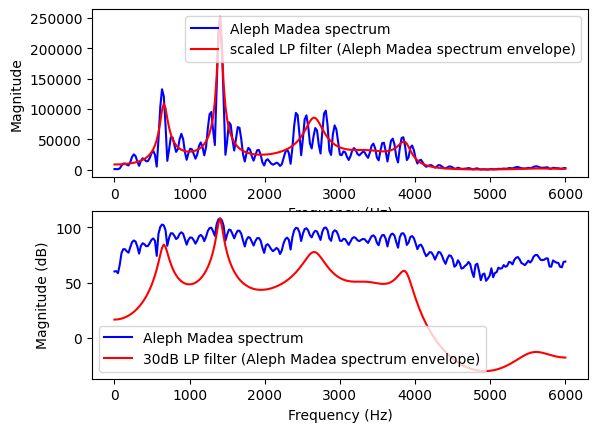

In [37]:
# Improve the display to accurately highlight peaks
f = f[:N//2+1]
FDX1 = FDX1[:N//2+1]
envelope1 = envelope1[:N//2+1]
FDX1dB = FDX1dB[:N//2+1]
envelope1dB = envelope1dB[:N//2+1]

# Plot Aleph Madea spectrum and its scaled envelope
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(f, FDX1, 'b', f, np.interp(envelope1, (envelope1.min(), envelope1.max()), (FDX1.min(), FDX1.max())), 'r')
plt.legend(['Aleph Madea spectrum', 'scaled LP filter (Aleph Madea spectrum envelope)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Plot Aleph Madea spectrum in dB and its scaled envelope with a 30 dB offset
plt.subplot(2, 1, 2)
plt.plot(f, FDX1dB, 'b', f, np.interp(envelope1dB, (envelope1dB.min(), envelope1dB.max()), (-30, FDX1dB.max())), 'r')
plt.legend(['Aleph Madea spectrum', '30dB LP filter (Aleph Madea spectrum envelope)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')

plt.show()

F1 = 656.25 Hz
F2 = 1406.25 Hz
F3 = 2648.4375 Hz


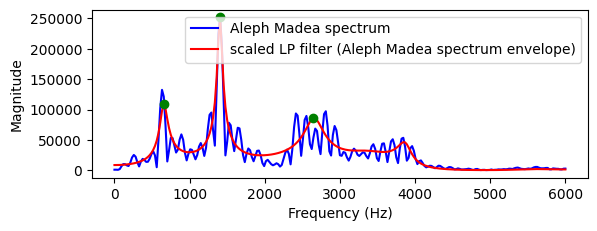

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming f, FDX1, envelope1 are already defined

# Improve the display to accurately highlight peaks
f = f[:N//2+1]
FDX1 = FDX1[:N//2+1]
envelope1 = envelope1[:N//2+1]

# Plot Aleph Madea spectrum and its scaled envelope
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(f, FDX1, 'b', f, np.interp(envelope1, (envelope1.min(), envelope1.max()), (FDX1.min(), FDX1.max())), 'r')
plt.legend(['Aleph Madea spectrum', 'scaled LP filter (Aleph Madea spectrum envelope)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Find peaks in the spectrum envelope
peaks, _ = find_peaks(envelope1)

# Ensure that at least three peaks are found
if len(peaks) >= 3:
    # Plot green circles at the first three peaks
    plt.plot(f[peaks[:3]], np.interp(envelope1[peaks[:3]], (envelope1.min(), envelope1.max()), (FDX1.min(), FDX1.max())), 'go')

    # Extract coordinates of the first three peaks
    peaks_x = f[peaks[:3]]
    peaks_y = np.interp(envelope1[peaks[:3]], (envelope1.min(), envelope1.max()), (FDX1.min(), FDX1.max()))

    # Print the coordinates with labels
    for i, (x, y) in enumerate(zip(peaks_x, peaks_y), start=1):
        print(f"F{i} = {x} Hz")

# Show the plot
plt.show()


F1 = 281.25 Hz
F2 = 1453.125 Hz
F3 = 2507.8125 Hz


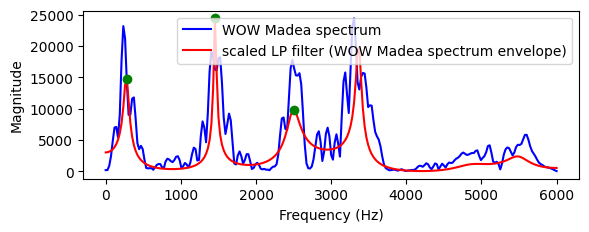

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


# Improve the display to accurately highlight peaks
f = f[:N//2+1]
FDX2 = FDX2[:N//2+1]
envelope2 = envelope2[:N//2+1]

# Plot Aleph Madea spectrum and its scaled envelope
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(f, FDX2, 'b', f, np.interp(envelope2, (envelope2.min(), envelope2.max()), (FDX2.min(), FDX2.max())), 'r')
plt.legend(['WOW Madea spectrum', 'scaled LP filter (WOW Madea spectrum envelope)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Find peaks in the spectrum envelope
peaks, _ = find_peaks(envelope2)

# Ensure that at least three peaks are found
if len(peaks) >= 3:
    # Plot green circles at the first three peaks
    plt.plot(f[peaks[:3]], np.interp(envelope2[peaks[:3]], (envelope2.min(), envelope2.max()), (FDX2.min(), FDX2.max())), 'go')

    # Extract coordinates of the first three peaks
    peaks_x = f[peaks[:3]]
    peaks_y = np.interp(envelope2[peaks[:3]], (envelope2.min(), envelope2.max()), (FDX2.min(), FDX2.max()))

    # Print the coordinates with labels
    for i, (x, y) in enumerate(zip(peaks_x, peaks_y), start=1):
        print(f"F{i} = {x} Hz")

# Show the plot
plt.show()